In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Convert exp data file to csv file

In [4]:
with open('audio_exp/20230614/data.csv(55).txt', 'r') as file:
    lines = file.readlines()

modified_line = ""
for line in lines:
    modified_line += line

modified_line = modified_line.replace('\n\n\n', '   ')
modified_line = modified_line.replace('\n\n', ' ')
modified_line = modified_line.replace('\n', '')
modified_line = modified_line.replace('   ', '\n')
modified_line = modified_line.replace('%20', ' ')

with open('output_01.csv', 'w') as file:
    file.write("time,sound,confidence\n")
    file.write(modified_line)

## Arrange the data in csv file

- The data of each line in the csv file is sorted according to time and collected by each time, and the data measured at the same time is also sorted according to the type of sound.<br>
Using this sorted data, time-series analysis is performed at the later steps.

In [173]:
unit_time_per_hour = 3
total_hour = 9

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv('output_01.csv')

sound_names = ['Background Noise',
               'back pulley',
               'bavk sw',
               'cp',
               'front roller',
               'motor pulley',
               'under rail']
total_num_heard = []

for i in range(total_hour * unit_time_per_hour):
    # print(i)
    number_heard = []
    start_time = i * (60/unit_time_per_hour) * 60 * 1000
    end_time = (i+1) * (60/unit_time_per_hour) * 60 * 1000
    # Select the dataset where 'confidence' is larger than 0.5
    for sn in sound_names:
        selected_dataset = dataset[(dataset['confidence'] > 0.3) & 
                                (dataset['sound'] == sn) & 
                                (dataset['time'] >= start_time) & 
                                (dataset['time'] <= end_time)]
        number_heard.append(selected_dataset['time'].count())
        # print(f"sound [{sn}] with {selected_dataset['time'].count()} times.")

    total_num_heard.append(number_heard)

    # Plotting the graph
    # plt.bar(sound_names, number_heard)
    # plt.xlabel('sounds')
    # plt.ylabel('num heard')
    # plt.title('num heard vs. sound')
    # plt.grid(True)
    # plt.show()

# print(total_num_heard)

In [ ]:
ndx = 0
x_val = []
time_val = []
for val in range(total_hour * unit_time_per_hour):
    x_val.append(val)
    time_val.append(val/unit_time_per_hour)

for sound_name in sound_names:
    y_val = []

    for x in x_val:
        y_val.append(total_num_heard[x][ndx])

    plt.plot(time_val, y_val, label = sound_name)
    ndx += 1

plt.legend()
# plt.xscale('log')
# plt.ylim(0, 300)
# plt.xlim(0.5)
plt.xlabel('op time')
plt.ylabel('num heard')
plt.title('num heard vs. op time')
plt.grid(True)
plt.show()

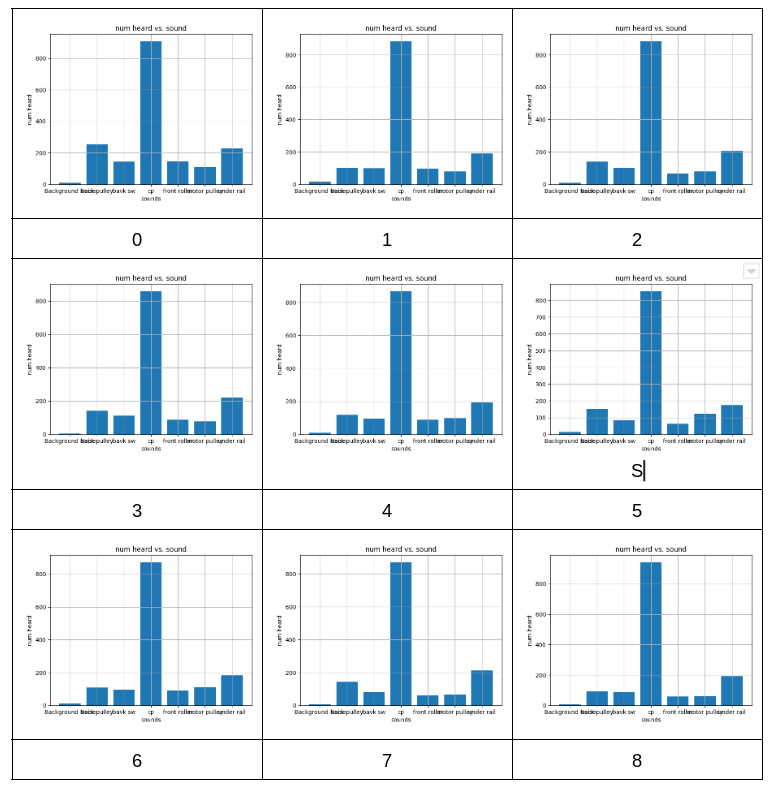

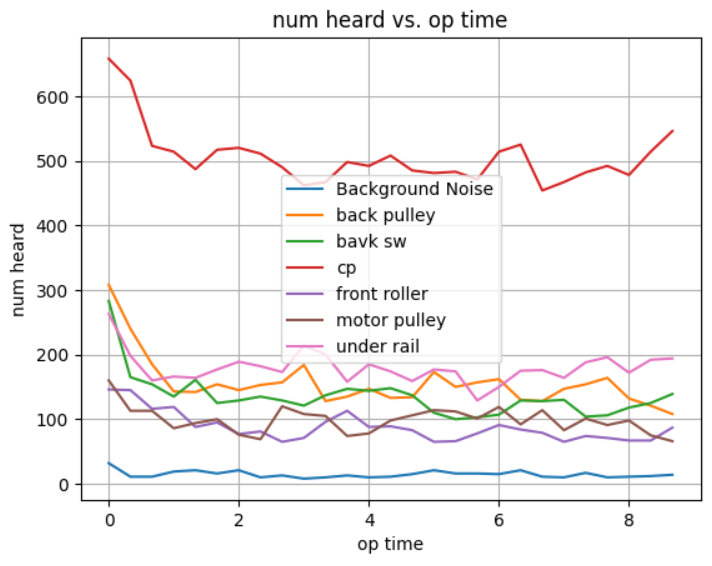

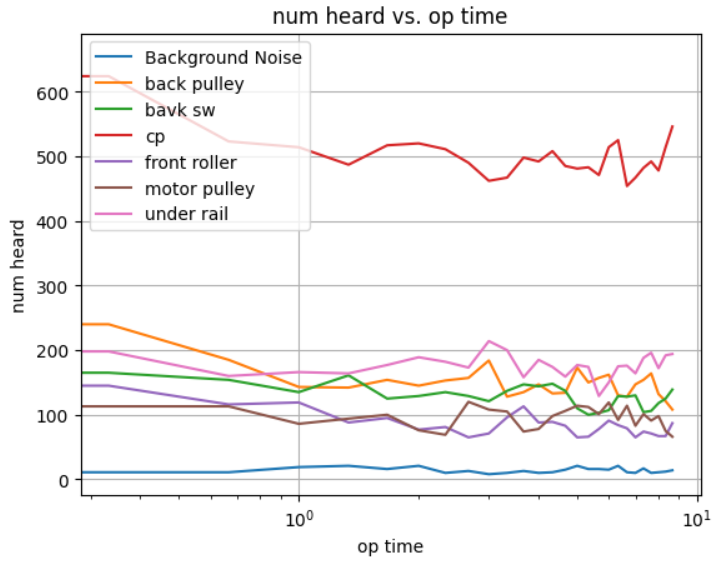